# Visualización Aplicada: Comparando Variables Categóricas

Nos enfocamos ahora ya en visualizar la relación entre dos variables, en concreto entre dos variables categóricas. Lancemos los preparativos:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")
df_vuelos = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

## Categóricas

### Gráficos y consideraciones  

Vamos a ver:
* Comparativa de frecuencias por valores de una de las variables (con diagramas de barras y catplot)
* Tablas de contigencia (como mapas de calor)  

* **Cuándo**: En análisis bivariantes los dos tipos son convenientes. En presentaciones las tablas de contigencia suelen ser demasiado "informativas" (Como todos los heatmaps si llevan números), pero son visualmente "atractivas" si se usan bien los colores. De usar tablas/mapas de calor quitar los numeros, remarcar la zona donde esté el dato importante que justifique nuestro mensaje.

* **Cuándo no**: En presentaciones, no usar tablas (casi) NUNCA (sí eso nunca, demasiados números y estás out), bueno savo que alguien te haya pedido que quiere ver los números de esa tabla o la tabla sea de dos por dos. Los mapas de calor sin números salvo en las casillas realmente relevantes.

* **Genérico**: Además si las variables tienen cardinalidades altas, en presentación aplica lo que ya dijimos crear categorías otros para poner allí las categorias no relevantes de una y otra variable (si es necesario no mostrarla)

### Catplot comparativa de frecuencias con Seaborn

Antes de empezar con las gráficas no está de más recordar como obtener las frecuencias de una variable (las de dos lo veremos en las tablas de contingencia):


In [3]:
# Obtener las freceuncias absolutas y relativas de la variable/columna "state" del dataset df_seguros

frecuencias_absolutas = df_seguros["state"].value_counts()
frecuencias_relativas = df_seguros["state"].value_counts(normalize = True) *  100

print(frecuencias_absolutas)
print(frecuencias_relativas)

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
state
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: proportion, dtype: float64


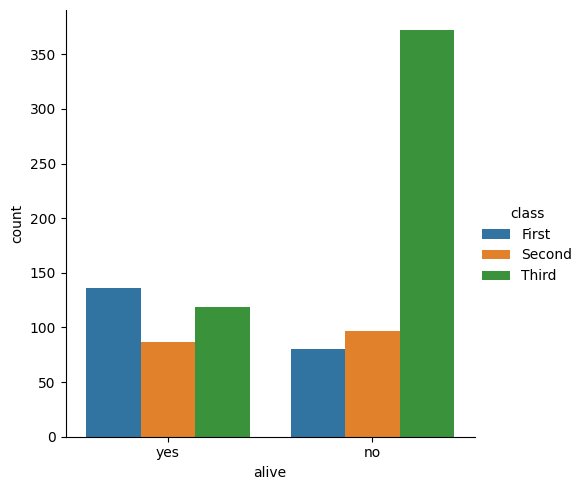

In [4]:
#### Tablas de frecuencias absolutas modo 1

sns.catplot(x = "alive",
            hue = "class", #---> un color diferente para cada class
            kind = "count",
            edgecolor = ".6",
            orient = "V",
            data = df_titanic.sort_values("class"))


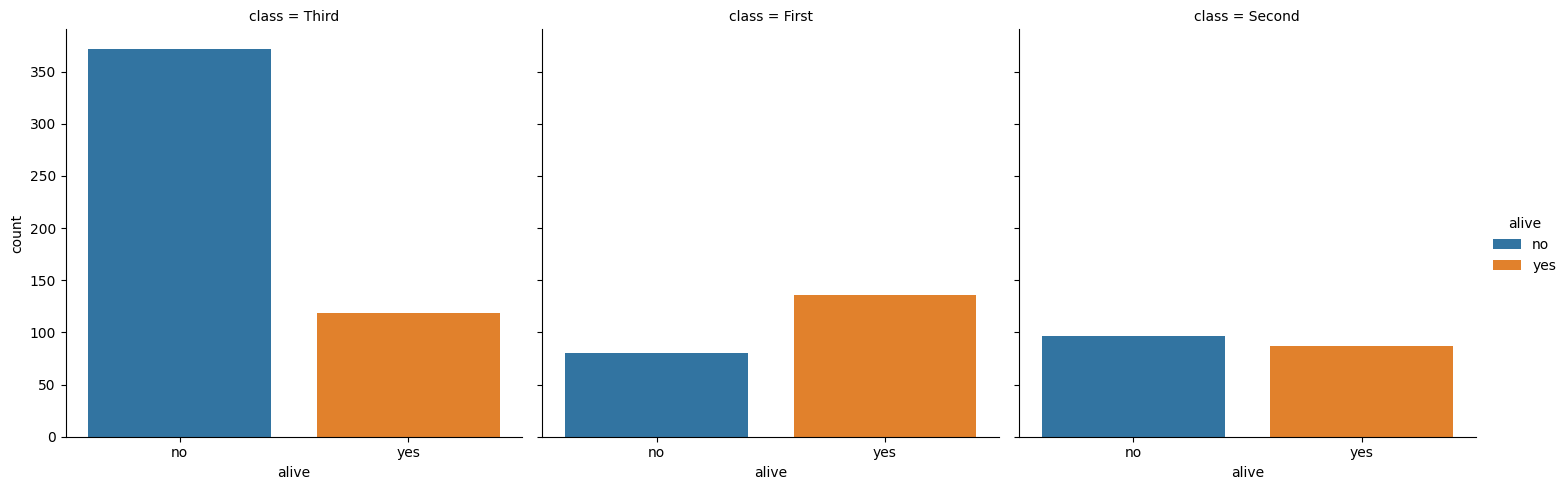

In [5]:
# Tabla de frecuencias modo 2

sns.catplot(x="alive",
            col = "class",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=df_titanic);

Si queremos frecuencias relativas, primero tenemos que calcularlas y luego ya aplicamos una visualización:

In [6]:
cat_colx = "alive"
cat_coly = "class"
frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
print(frecuencias_absolutas)
print(frecuencias_relativas)

    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119
    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363


In [7]:
frecuencias_relativas["proportion"] *= 100
frecuencias_relativas

,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


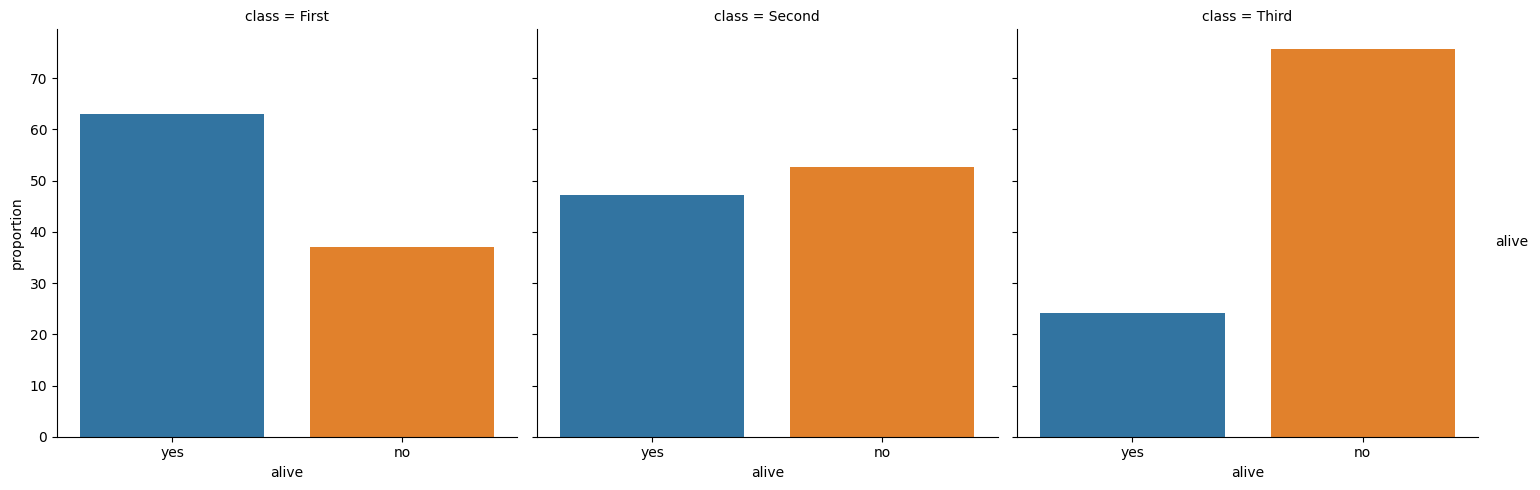

In [8]:
# Pintamos modo1
sns.catplot(x="alive",
            y = "proportion",
            col="class",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

### Tablas de contingencia y Mapas de Calor

Otra forma numérica de ver las frecuencias de aparición conjunta de los valores de dos variables categóricas es recurrir a las tablas de contingencia:

In [9]:
tabla_contingencia = pd.crosstab(df_titanic["embark_town"],
                                 df_titanic["who"],
                                 margins = False)

tabla_contingencia

who,child,man,woman
embark_town,,,
Cherbourg,18,90,60
Queenstown,5,37,35
Southampton,60,410,174


In [10]:
cat_colx = "who"
cat_coly = "embark_town"
frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_absolutas

,embark_town,who,count
0,Cherbourg,man,90
1,Cherbourg,woman,60
2,Cherbourg,child,18
3,Queenstown,man,37
4,Queenstown,woman,35
5,Queenstown,child,5
6,Southampton,man,410
7,Southampton,woman,174
8,Southampton,child,60


#### Mapa de calor de la tabla de contigencia:

Si queremos que la tabla de contingencia sea más "presentable", la convertimos en un mapa de calor:

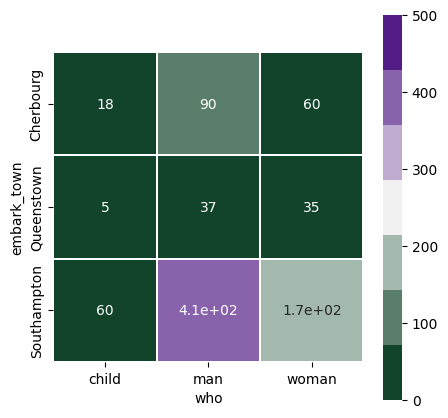

In [11]:
plt.figure(figsize = (5,5))
sns.heatmap(tabla_contingencia,
            vmin = 0,
            vmax = 500,
            cmap = sns.diverging_palette(145, 280, s = 85, l = 25, n = 7),
            square = True,
            linewidths = .1,
            annot = True);

Bastante visual,¿eh? Incluso más que las barras de frecuencia, si es lo que quiero mostrar... Pero es engorrosa... De usarla cómo lo haría yo:

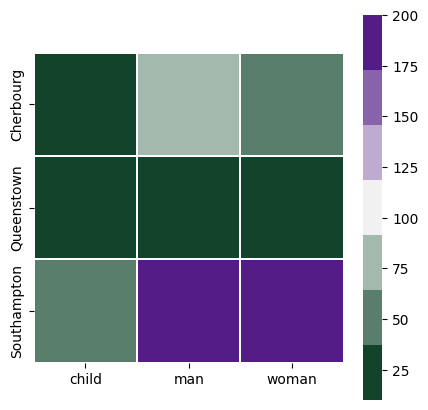

In [12]:

plt.figure(figsize=(5,5))
sns.heatmap(tabla_contingencia,
            vmin = 10,
            vmax = 200,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square = True,
            linewidths=.1,
            annot=False);
plt.xlabel("")
plt.ylabel("");

# Visualización Aplicada: Categórica y numérica

In [13]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Gráficos y consideraciones

Vamosa  ver, en general, comparación de distribuciones o evoluciones por valor de la variable categóricas:
- Comparación de diagramas de caja
- Comparación de histrogramas y fuciones de densidad
- Comparación con agregaciones de la numérica: Treemaps  

* **Cuándo**: 
    1. En análisis bivariantes todos son útiles, pero alguno repetitivo y si la cardinalidad de la variable categórica es alta comparar histogramas se hace casi imposibe, en ese caso utilizar sólo comparación de cajas. Si se trata de variables de una serie o evolución temporal siempre comparar líneas. 
    2. En presentaciones (para información no temporal o series) siempre recordar la maxima de no abrumar con información (los árboles no dejarán ver el bosque). Cuando tenemos tanta información visual posible siempre debe ser un acompañamiento de refuerzo o estético visual al mensaje que queramos dar (es decir que usemos  ejes sencillos, no poner datos númericos salvo los relevantes, que se vea claramente que grafica es cual). Si estamos comparando formas o líneas, por ejemplo, usar mejor KDE que histograma, marcar las regiones que queremos resaltar como parecidas o diferentes. 
    3. En presentación de datos que son evoluciones temporales en cambio estas visualizaciones ayudan bastante y rigen los mismos principios: no abrumar con números o textos, marcar las regiones o puntos realmente informativos para el mensaje que se quiere dar. 
  

  
* **Cuándo no**: En presentaciones, en general, NO USAR HISTOGRAMAS (salvo que el público lo demande) son muchas barras :-), NI DIAGRAMAS DE CAJAS, si tienes que poner una "caja": usa Violines. Los treemap son muy visuales pero son una variante del mapa de calor, así que escoge bien el patrón de colores, destaca el dato que refuerce tu mensaje, no abrumes con textos y números (sólo lo relevante, salvo que te lo hayan pedido)

* **Genérico**: Además si las variables tienen cardinalidades altas, en presentación también aplica lo que ya dijimos crear categorías otros para poner allí las categorias no relevantes de una y otra variable (si es necesario no mostrarla)

### Comparación de diagramas de "Caja" y dispersión:


Recordemos como obtener las medidas de tendencias central y de posición:

In [14]:
variable_categorica = "aircompany"
variable_numerica = "ingresos"
df_viajes.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

,aircompany,count,mean,std,min,25%,50%,75%,max
0,Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
1,FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
2,MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
3,PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
4,TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


Comparación de diagramas de dispersión según la variable categórica

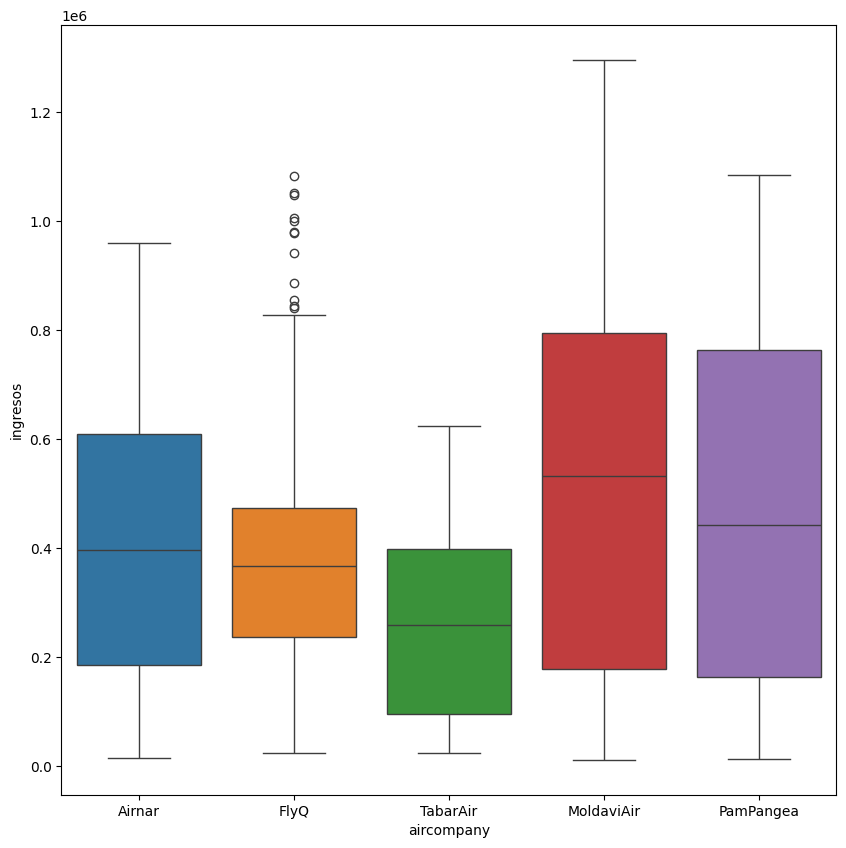

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "aircompany",
            y = "ingresos",
            hue = "aircompany",
            data=df_vuelos);

### Comparación de histrogramas y funciones de densidad:


Cambiamos a clase y precio del billete en el dataset del Titanic:

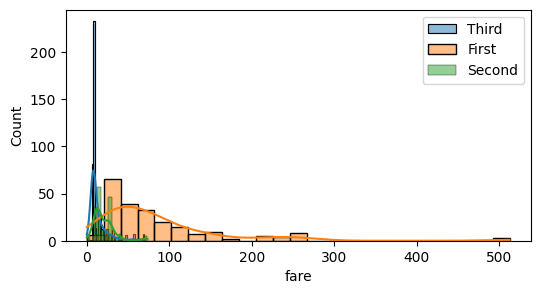

In [16]:
# Añadiremos los diagramas a la misma figura creando uno a uno y aprovechando que así funciona matplotlib
variable_categorica = "class"
variable_numerica = "fare"

plt.figure(figsize=(6,3))
for valor in df_titanic[variable_categorica].unique():  
    sns.histplot(df_titanic.loc[df_titanic[variable_categorica] == valor,variable_numerica], kde= True, label=valor)
plt.legend();

### Comparación categorizando: Los treemaps

El diagrama tipo treemap nos permite visualizar en forma de mapa (ahora lo veremos) la relación entre una variable categórica y una variable numérica, es bastante visual, pero nos salimos eventualmente de seaborn y trabajamos con `squarify`. Y es interesante para comparar agregaciones de valores (es decir la media de las variables numéricas, sus máximos, sus agregados...)

Vamos a obtener el treemap de "aircompany", comparando sus ingresos totales y sus consumos:

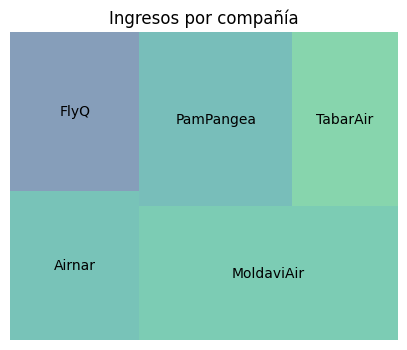

In [17]:
import squarify # Primero importamos squarify

# Obtenemos los datos, haciendo la agregación que queramos:

variable_categorica = "aircompany"
variable_numerica = "ingresos"
operacion_agregacion = "sum"

datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Ingresos por compañía")
plt.axis("off");

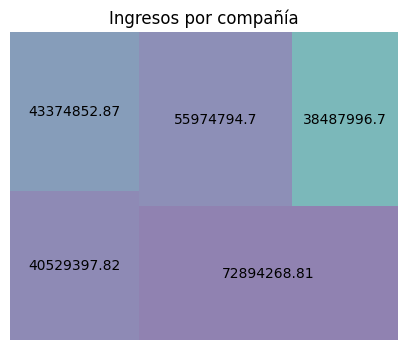

In [18]:
variable_categorica = "aircompany"
variable_numerica = "ingresos"
operacion_agregacion = "sum"

datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_numerica], alpha = 0.6)
plt.title("Ingresos por compañía")
plt.axis("off");

(0.0, 100.0, 0.0, 100.0)

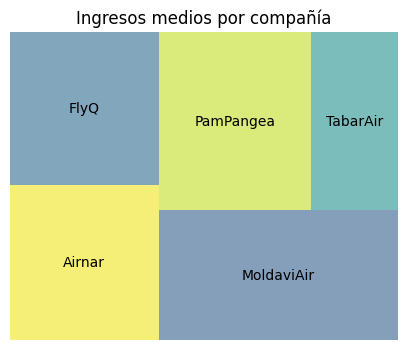

In [19]:
variable_categorica = "aircompany"
variable_numerica = "ingresos"
operacion_agregacion = "mean" #--> En vez de la suma, la media

datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Ingresos medios por compañía")
plt.axis("off")

Aplican las mismas sugerencias y guías que para los mapas de calor... 

# Visualización Aplicada: Comparando dos variables numéricas

### Gráficos y consideraciones

Nos vamos a centrar en:
- Comparación de diagramas de caja
- Comparación de histogramas 
- Diagramas de dispersión

* **Cuándo**: 
    1. En análisis bivariantes todos son útiles aunque si buscamos relaciones los diagramas de dispersión son interesantes.
    2. En presentaciones: Cuando se están comparando valores de una misma variable en dos tiempos o dos situaciones diferentes, usar la comparación de distribuciones y dispersión (y siempre como un elemento más gráfico que numérico, no abrumar... enfocar). En el caso de dos variables que no miden lo mismo, generalmente buscaremos hablar de la correlación así que usar los diagramas de dispersión marcando el mensaje (pendientes de la correlación, existencia de la correlación incluyendo funciones ideales que la representen, etc). 
  
* **Cuándo no**: Rige lo mismo que para la anterior clasificación, en presentaciones, en general, NO USAR HISTOGRAMAS (salvo que el público lo demande) son muchas barras :-), NI DIAGRAMAS DE CAJAS, si tienes que poner una "caja": usa Violines. Si quieres comparar distribuciones, compara KDE/Densidades, y si lo haces con histrogramas no uses ni muchas ni pocas barras y quita toda referencia numérica salvo la necesaria que apoye el mensaje que se quiera dar.


### Comparación de diagramas de caja


Tiene sentido cuando comparamos variables similares para valores de variables categóricas (como hicimos con "aircompany" e "ingresos" y estábamos comparando ingresos con ingresos), pero también comparando dos fotos en distintos momentos temporales:

In [22]:
df_vuelos_jul = pd.read_csv("./data/dataset_viajes_jul23.csv")
df_vuelos_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_vuelos_jul.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,PamPangea,Nueva York,Londres,5566,Airbus A320,True,15255.96072,523,220563.17,Pam_NuLo_11320,Jul23
1,TabarAir,Cincinnati,Los Angeles,3073,Airbus A380,False,36234.35760,224,192311.81,Tab_CiLo_11380,Jul23
2,FlyQ,Barcelona,Roma,859,Boeing 747,False,9248.50940,77,52866.89,Fly_BaRo_10747,Jul23
3,PamPangea,Ginebra,Bali,12383,Boeing 747,False,138602.91900,845,723138.29,Pam_GiBa_10747,Jul23
4,MoldaviAir,Cádiz,Bali,12798,Airbus A380,False,150903.77760,873,807447.93,Mol_CaBa_11380,Jul23


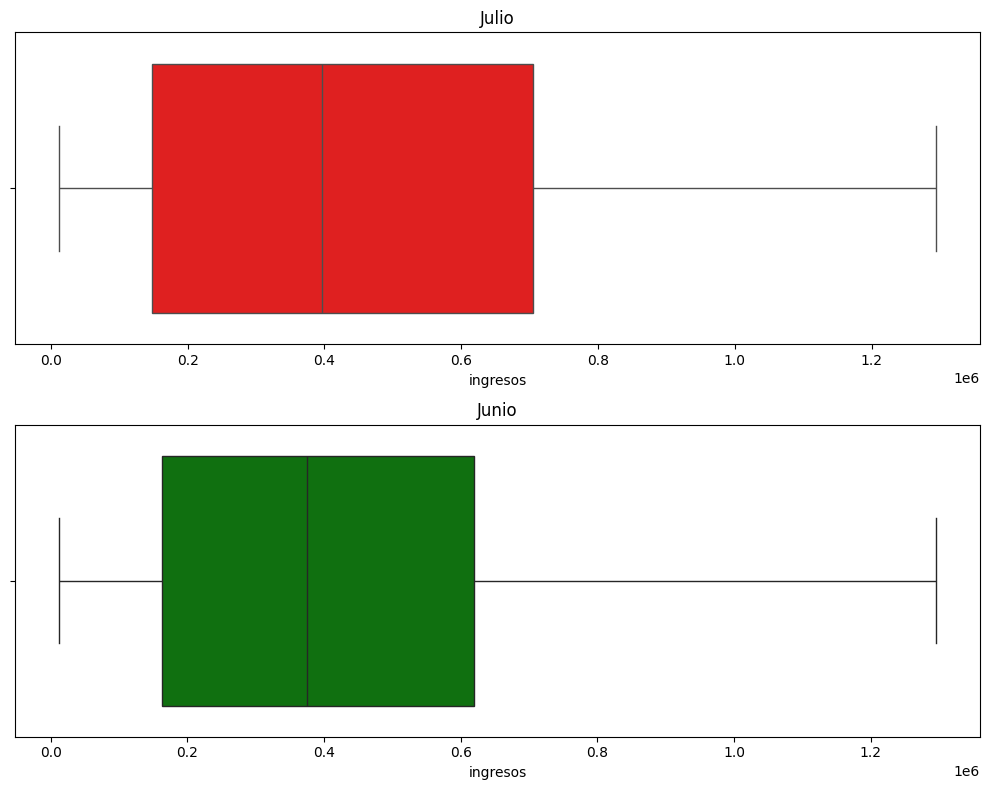

In [23]:
fig, axs = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = df_vuelos_jul["ingresos"], ax = axs[0], color = "red")
axs[0].set_title("Julio")
sns.boxplot(x = df_vuelos_jun["ingresos"], ax = axs[1], color = "green")
axs[1].set_title("Junio")
plt.tight_layout()

### Comparación de histrogramas


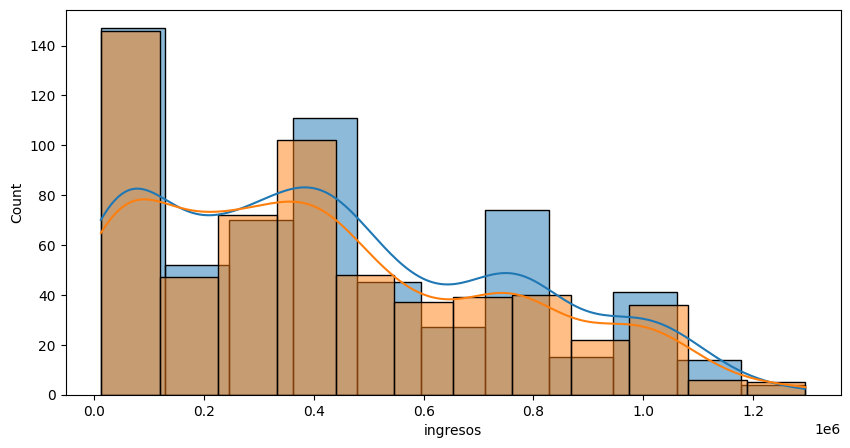

In [25]:
plt.figure(figsize = (10, 5))
sns.histplot(x = "ingresos", data = df_vuelos_jul, kde = True, label = "Julio")
sns.histplot(x = "ingresos", data = df_vuelos_jun, kde = True, label = "Junio");


De igual manera que comparamos las dispersiones por los diagramas de cajas, lo hacemos con los histogramas

#### Inciso: Comparaciones numéricas

Antes de seguir, volver a incidir en que siempre es bueno "pintarse" los números, ¿cómo comparamos las estadísticas centrales y de posición de dos variables en diferentes momentos (en este caso temporales)?

In [26]:
metricas_junio = df_vuelos_jun.ingresos.describe()
metricas_julio = df_vuelos_jul.ingresos.describe()

df_comparativa = pd.DataFrame({"julio": metricas_julio, "junio": metricas_junio})
df_comparativa

,julio,junio
count,6.000000e+02,6.000000e+02
mean,4.309536e+05,4.187689e+05
std,3.188093e+05,3.182858e+05
min,1.169364e+04,1.179785e+04
25%,1.480056e+05,1.627668e+05
50%,3.960467e+05,3.754817e+05
75%,7.046383e+05,6.188420e+05
max,1.294102e+06,1.295516e+06


### Diagramas de dispersión

Para terminar, recuperamos la comparación de variables o columnas que están en el mismo dataframe y hacen referencia a la misma fila, es decir son características de una misma entidad:

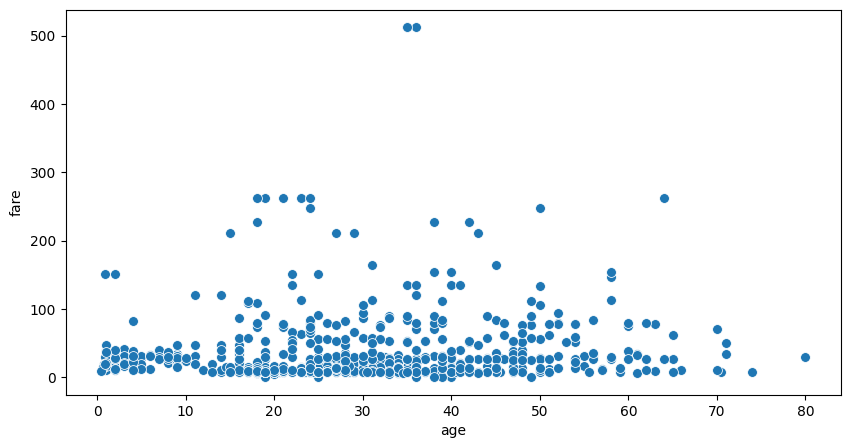

In [31]:
variable_numerica_1 = "age"
variable_numerica_2 = "fare"

plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1,
                y= variable_numerica_2,
                data = df_titanic,
               s=50);

Para terminar vamos a ver un complemento interesante, aunque más para el análisis que para las visualizaciones desde mi punto de vista, que es el joinplot:

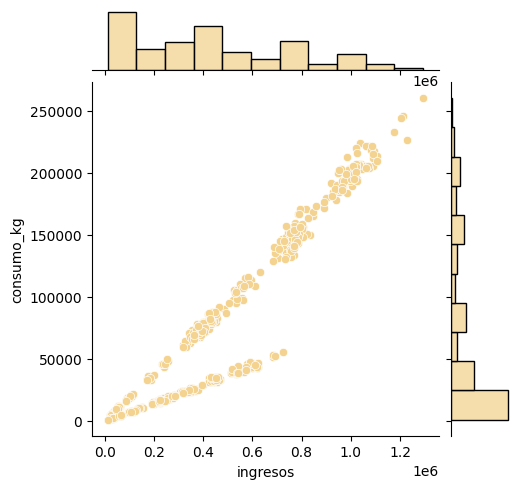

In [33]:
sns.jointplot(x = df_vuelos_jul["ingresos"],
             y = df_vuelos_jul["consumo_kg"],
             color = "#f4D391",
             height = 5);